# Activation function evaluation

In [0]:
#!pip install tensorflow==2.0

     |████████████████████████████████| 86.3MB 61kB/s 
     |████████████████████████████████| 3.8MB 34.4MB/s 
     |████████████████████████████████| 450kB 61.8MB/s 
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: tensorflow 1.15.0
    Uninstalling tensorflow-1.15.0:
      Successfully uninstalled tensorflow-1.15.0


In [1]:
import tensorflow as tf

print(tf.__version__)

1.13.1


In [0]:
%matplotlib inline


import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.activations import relu
import matplotlib.pyplot as plt

In [0]:
# https://corochann.com/mnist-dataset-introduction-1138.html  Introdcution to MNIST dataset


(x_train, y_train), (x_test, y_test) = mnist.load_data()

num_classes = 10
x_train = x_train.reshape(60000, 784)    # 784 = 28 X 28 the size of each image. There are 60000 images for training
x_test = x_test.reshape(10000, 784)      # Images are flattended out into a vector of 784 elements
x_train = x_train.astype('float32')      # Change the data type to float from integer (0 - 255)
x_test = x_test.astype('float32')
x_train /= 255                           # Scale the data between 0 and 1
x_test /= 255
y_train = tf.keras.utils.to_categorical(y_train, num_classes)   # Converting the target into categorical which is stored as numeric
y_test = tf.keras.utils.to_categorical(y_test, num_classes)     # Keras converst these into 1-hot coded vectors as these are lables


print ('Train size:', x_train.shape[0])
print ('Test size:', x_test.shape[0])

Train size: 60000
Test size: 10000


In [0]:
print(tf.__version__)

2.2.0-rc2


In [0]:
model = Sequential()
model.add(Dense(784, activation='relu', input_shape=(784,)))   #First hidden layer of 784  neurons, each neuron takes input 
                                                               # vector of size 784



model.add(Dense(num_classes, activation='softmax'))            # Adding a softmax layer for output which contains as many 
                                                               # neurons as the number of classes (10) which is also the 
                                                               # the shape of each output vector ( one hot coded)

                                                               # output layer also uses softmax. This normalizes the values 
                                                               # from the ten output nodes such that: 
                                                               #        all the values are between 0 and 1, and
                                                               #        the sum of all ten values is 1.  
                                                               # prediction is the lable of the node that gets highest fraction, is 
        
        

for l in model.layers:
    print (l.name, l.input_shape,'==>',l.output_shape)
print()
print (model.summary())



dense_145 (None, 784) ==> (None, 784)
dense_146 (None, 784) ==> (None, 10)

Model: "sequential_66"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_145 (Dense)            (None, 784)               615440    
_________________________________________________________________
dense_146 (Dense)            (None, 10)                7850      
Total params: 623,290
Trainable params: 623,290
Non-trainable params: 0
_________________________________________________________________
None


model accuracy : 0.9830999970436096


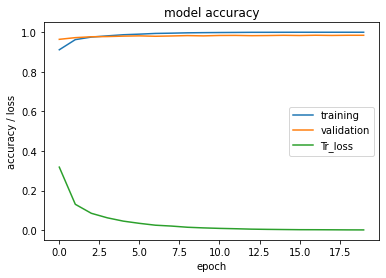

In [0]:
batch_size = 256
epochs = 20

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=.1, verbose=False)
loss,accuracy  = model.evaluate(x_test, y_test, verbose=False)
print("model accuracy :" , accuracy)
#print("validation accuracy : ", val_accuracy)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.title('model accuracy')
plt.ylabel('accuracy / loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation','Tr_loss'], loc='best')
plt.show()

[0.9641666412353516, 0.9726666808128357, 0.9771666526794434, 0.9781666398048401, 0.9803333282470703, 0.9816666841506958, 0.9796666502952576, 0.981166660785675, 0.9829999804496765, 0.9816666841506958, 0.9836666584014893, 0.984000027179718, 0.9826666712760925, 0.9833333492279053, 0.984499990940094, 0.9835000038146973, 0.9848333597183228, 0.9838333129882812, 0.984666645526886, 0.984666645526886]
[0.9114259481430054, 0.9626666903495789, 0.9756110906600952, 0.9817036986351013, 0.9873518347740173, 0.9903703927993774, 0.9939629435539246, 0.99529629945755, 0.997092604637146, 0.9979259371757507, 0.9985926151275635, 0.9990555644035339, 0.9996111392974854, 0.9997037053108215, 0.9998518228530884, 0.9999444484710693, 0.9999259114265442, 0.9999444484710693, 1.0, 1.0]


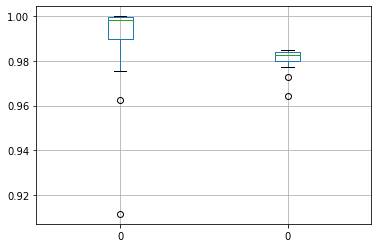

In [0]:
import pandas as pd

print(history.history['val_accuracy'])

print(history.history['accuracy'])

ta = pd.DataFrame(history.history['accuracy'])
va = pd.DataFrame(history.history['val_accuracy'])

tva = pd.concat([ta,va] , axis=1)

tva.boxplot()

In [0]:
# With simple two layer NN, got an accuracy of 98%+ 
# But training and validation scores are in different ranges ... looks like overfitting case
# The accuracy is reached quite early in the epochs within first 5



# Number of hidden layers

In [0]:
def create_dense(layer_sizes):
    model = Sequential()
    model.add(Dense(layer_sizes[0], activation='relu', input_shape=(784,)))

    for s in layer_sizes[1:]:
        model.add(Dense(units = s, activation = 'relu'))

    model.add(Dense(units=num_classes, activation='softmax'))
    return model

def evaluate(model, batch_size=batch_size, epochs=epochs):
    model.summary()
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=50, validation_split=.1, verbose=False)
    loss,accuracy  = model.evaluate(x_test, y_test, verbose=False)
    
    print("Model accuracy : ", accuracy)
 
    
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.plot(history.history['loss'])
    plt.title('model accuracy')
    plt.ylabel('accuracy / loss')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation', 'tr_loss'], loc='best')
    plt.show()

    

Model: "sequential_67"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_147 (Dense)            (None, 784)               615440    
_________________________________________________________________
dense_148 (Dense)            (None, 784)               615440    
_________________________________________________________________
dense_149 (Dense)            (None, 10)                7850      
Total params: 1,238,730
Trainable params: 1,238,730
Non-trainable params: 0
_________________________________________________________________
Model accuracy :  0.9857000112533569


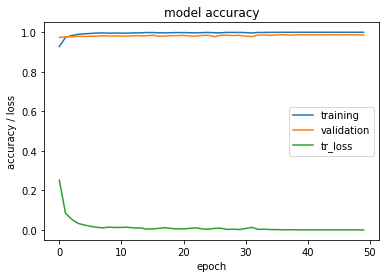

Model: "sequential_68"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_150 (Dense)            (None, 784)               615440    
_________________________________________________________________
dense_151 (Dense)            (None, 784)               615440    
_________________________________________________________________
dense_152 (Dense)            (None, 784)               615440    
_________________________________________________________________
dense_153 (Dense)            (None, 10)                7850      
Total params: 1,854,170
Trainable params: 1,854,170
Non-trainable params: 0
_________________________________________________________________
Model accuracy :  0.9819999933242798


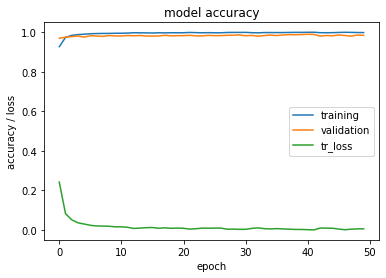

In [0]:
for layers in range(2,4):
    model = create_dense([784] * layers)
    evaluate(model)

[0.9641666412353516, 0.9746666550636292, 0.9758333563804626, 0.9800000190734863, 0.9798333048820496, 0.9821666479110718, 0.9831666946411133, 0.9816666841506958, 0.9829999804496765, 0.9819999933242798, 0.9835000038146973, 0.9836666584014893, 0.98416668176651, 0.9835000038146973, 0.9838333129882812, 0.9858333468437195, 0.9853333234786987, 0.984499990940094, 0.9850000143051147, 0.984666645526886]
[0.911648154258728, 0.9625555276870728, 0.9758148193359375, 0.9824259281158447, 0.9874629378318787, 0.9912407398223877, 0.9938703775405884, 0.9957777857780457, 0.9974814653396606, 0.9978703856468201, 0.9987221956253052, 0.9992777705192566, 0.9993518590927124, 0.9995370507240295, 0.999833345413208, 0.9999259114265442, 1.0, 1.0, 0.9999814629554749, 1.0]


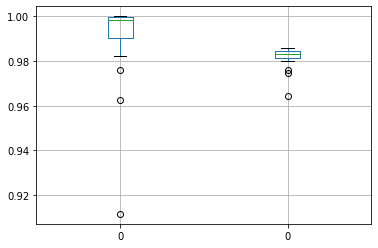

In [0]:
print(history.history['val_accuracy'])

print(history.history['accuracy'])

ta = pd.DataFrame(history.history['accuracy'])
va = pd.DataFrame(history.history['val_accuracy'])

tva = pd.concat([ta,va] , axis=1)

tva.boxplot()

## Observations about number of layers

1. With one hidden layer of 784 neurons and one ouput layer of 10 the validation score is 98% rounded
2. Increasing the hidden layer by one with same number of neurons shows the model is becoming wavy and overfit. Training accuracy is close to 1 while validation accuracy remains at 98% rounded
3. Increasing the hidden layer by one more makes the situation even worse
4. Returns are not enough to justify the number of parameters to learn
5. Freeze number of hiddden layers to 1




# Reduce number of neurons to 256 with only one hidden layer 

In [0]:
model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(784,)))   
model.add(Dense(num_classes, activation='softmax'))             
 
for l in model.layers:
    print (l.name, l.input_shape,'==>',l.output_shape)
print()
print (model.summary())


dense_154 (None, 784) ==> (None, 256)
dense_155 (None, 256) ==> (None, 10)

Model: "sequential_69"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_154 (Dense)            (None, 256)               200960    
_________________________________________________________________
dense_155 (Dense)            (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
None


model accuracy : 0.9807999730110168


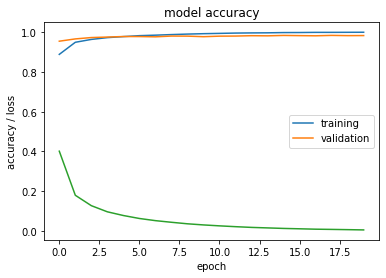

In [0]:
batch_size = 256
epochs = 20

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=.1, verbose=False)
loss,accuracy  = model.evaluate(x_test, y_test, verbose=False)
print("model accuracy :" , accuracy)
#print("validation accuracy : ", val_accuracy)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.title('model accuracy')
plt.ylabel('accuracy / loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

[0.9545000195503235, 0.9660000205039978, 0.9728333353996277, 0.9753333330154419, 0.9779999852180481, 0.9778333306312561, 0.9764999747276306, 0.9803333282470703, 0.9800000190734863, 0.9771666526794434, 0.9798333048820496, 0.9803333282470703, 0.9821666479110718, 0.9815000295639038, 0.9835000038146973, 0.9825000166893005, 0.9816666841506958, 0.9836666584014893, 0.9825000166893005, 0.9828333258628845]
[0.88825923204422, 0.9490370154380798, 0.9634814858436584, 0.9724444150924683, 0.9775925874710083, 0.9823333621025085, 0.9848333597183228, 0.9877777695655823, 0.9902963042259216, 0.9922962784767151, 0.9937962889671326, 0.9953333139419556, 0.9961851835250854, 0.996666669845581, 0.9978888630867004, 0.9981481432914734, 0.9989073872566223, 0.998962938785553, 0.9992222189903259, 0.9995370507240295]


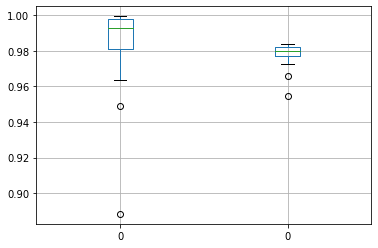

In [0]:
print(history.history['val_accuracy'])

print(history.history['accuracy'])

ta = pd.DataFrame(history.history['accuracy'])
va = pd.DataFrame(history.history['val_accuracy'])

tva = pd.concat([ta,va] , axis=1)

tva.boxplot()

## With 256 neurons and one hidden layer

1. we are getting similar results in validation as with 784 neurons. 
2. The degree of overfit (between training and validation) is also reduced as is evident from training box plot

3. With 128 neruons the validation accuracy drops to 97% rounded and the degree of overfit reduces further
4. Futher reduction of neurons degrades the peformance both in training and validation


## Impact of batch size

In [0]:
model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(784,)))   
model.add(Dense(num_classes, activation='softmax'))              
        
        

for l in model.layers:
    print (l.name, l.input_shape,'==>',l.output_shape)
print()
print (model.summary())


dense_156 (None, 784) ==> (None, 256)
dense_157 (None, 256) ==> (None, 10)

Model: "sequential_70"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_156 (Dense)            (None, 256)               200960    
_________________________________________________________________
dense_157 (Dense)            (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
None


Epoch 1/20
2/2 [==============================] - 1s 328ms/step - loss: 2.2737 - accuracy: 0.1531 - val_loss: 1.9749 - val_accuracy: 0.4404
Epoch 2/20
2/2 [==============================] - 1s 291ms/step - loss: 1.8873 - accuracy: 0.5138 - val_loss: 1.6258 - val_accuracy: 0.6701
Epoch 3/20
2/2 [==============================] - 1s 287ms/step - loss: 1.5563 - accuracy: 0.6931 - val_loss: 1.3253 - val_accuracy: 0.7604
Epoch 4/20
2/2 [==============================] - 1s 289ms/step - loss: 1.2743 - accuracy: 0.7664 - val_loss: 1.0813 - val_accuracy: 0.8023
Epoch 5/20
2/2 [==============================] - 1s 292ms/step - loss: 1.0490 - accuracy: 0.7984 - val_loss: 0.8927 - val_accuracy: 0.8224
Epoch 6/20
2/2 [==============================] - 1s 285ms/step - loss: 0.8758 - accuracy: 0.8183 - val_loss: 0.7516 - val_accuracy: 0.8398
Epoch 7/20
2/2 [==============================] - 1s 290ms/step - loss: 0.7472 - accuracy: 0.8320 - val_loss: 0.6490 - val_accuracy: 0.8520
Epoch 8/20
2/2 [====

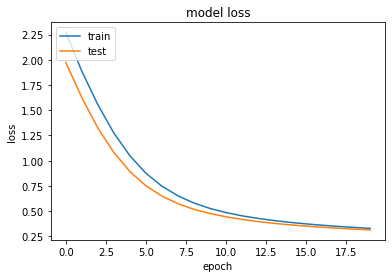

In [0]:
batch_size = 30000
epochs = 20
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1 )
    
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
#                    validation_data=(x_test, y_test))
                    validation_data=(x_test, y_test), callbacks = [es])

score = model.evaluate(x_test, y_test, verbose=False)

print()
print ('Test loss:', round(score[0], 3))
print ('Test accuracy:', round(score[1], 3))


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

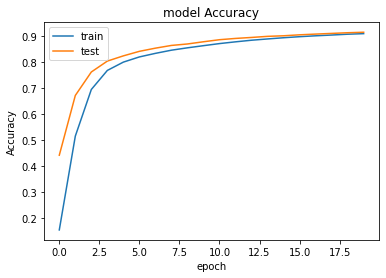

In [0]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')


[0.44040000438690186, 0.6700999736785889, 0.7603999972343445, 0.802299976348877, 0.8223999738693237, 0.8398000001907349, 0.8519999980926514, 0.862500011920929, 0.8680999875068665, 0.8766000270843506, 0.8845000267028809, 0.8894000053405762, 0.8931999802589417, 0.8974000215530396, 0.8996000289916992, 0.9032999873161316, 0.9060999751091003, 0.9086999893188477, 0.911300003528595, 0.9132000207901001]
[0.15308333933353424, 0.5137500166893005, 0.6931333541870117, 0.7664166688919067, 0.7983666658401489, 0.8183000087738037, 0.83201664686203, 0.8442000150680542, 0.8532999753952026, 0.8615333437919617, 0.8695833086967468, 0.8763333559036255, 0.8824999928474426, 0.8873999714851379, 0.8920666575431824, 0.8960999846458435, 0.8995166420936584, 0.9024500250816345, 0.9056333303451538, 0.907800018787384]


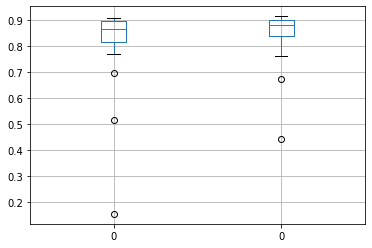

In [0]:
print(history.history['val_accuracy'])

print(history.history['accuracy'])

ta = pd.DataFrame(history.history['accuracy'])
va = pd.DataFrame(history.history['val_accuracy'])

tva = pd.concat([ta,va] , axis=1)

tva.boxplot()

## Observations on batch size

1. With smaller batch size the model becomes unstable in validation (as is evident from the accuracy chart)
2. Within the given 5 epochs the model becomes overfit (as is evident from the boxplot)
3. The validation accuracy reduces 

# Increase the Epochs

In [0]:
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(784,)))   
model.add(Dense(num_classes, activation='softmax'))              
        
        

for l in model.layers:
    print (l.name, l.input_shape,'==>',l.output_shape)
print()
print (model.summary())


dense_158 (None, 784) ==> (None, 256)
dense_159 (None, 256) ==> (None, 10)

Model: "sequential_71"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_158 (Dense)            (None, 256)               200960    
_________________________________________________________________
dense_159 (Dense)            (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
None


In [0]:
batch_size = 60000    
epochs = 100
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

es = EarlyStopping( monitor='val_loss', mode='min', min_delta = 0.01, verbose=1 )
    
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
#                    validation_data=(x_test, y_test))
                    validation_data=(x_test, y_test), callbacks = [es])

score = model.evaluate(x_test, y_test, verbose=False)

print()
print ('Test loss:', round(score[0], 3))
print ('Test accuracy:', round(score[1], 3))




Epoch 1/100
1/1 [==============================] - 0s 191ms/step - loss: 2.3386 - accuracy: 0.1464 - val_loss: 2.1049 - val_accuracy: 0.3443
Epoch 2/100
1/1 [==============================] - 0s 112ms/step - loss: 2.1128 - accuracy: 0.3318 - val_loss: 1.9080 - val_accuracy: 0.5067
Epoch 3/100
1/1 [==============================] - 0s 109ms/step - loss: 1.9185 - accuracy: 0.4938 - val_loss: 1.7295 - val_accuracy: 0.6379
Epoch 4/100
1/1 [==============================] - 0s 114ms/step - loss: 1.7422 - accuracy: 0.6222 - val_loss: 1.5643 - val_accuracy: 0.7097
Epoch 5/100
1/1 [==============================] - 0s 108ms/step - loss: 1.5792 - accuracy: 0.6962 - val_loss: 1.4114 - val_accuracy: 0.7512
Epoch 6/100
1/1 [==============================] - 0s 107ms/step - loss: 1.4284 - accuracy: 0.7374 - val_loss: 1.2719 - val_accuracy: 0.7789
Epoch 7/100
1/1 [==============================] - 0s 115ms/step - loss: 1.2907 - accuracy: 0.7655 - val_loss: 1.1470 - val_accuracy: 0.7956
Epoch 8/100
1

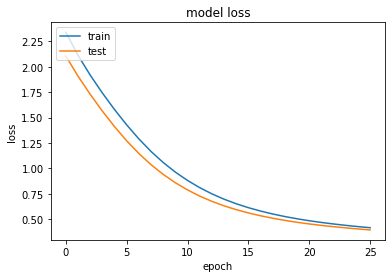

In [0]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

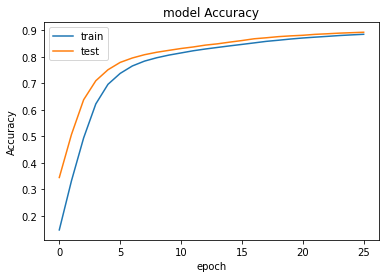

In [0]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

[0.3443000018596649, 0.5066999793052673, 0.6378999948501587, 0.7096999883651733, 0.7512000203132629, 0.7789000272750854, 0.7955999970436096, 0.8080000281333923, 0.8172000050544739, 0.824400007724762, 0.8313999772071838, 0.8371999859809875, 0.8442000150680542, 0.8490999937057495, 0.8554999828338623, 0.8614000082015991, 0.8680999875068665, 0.8719000220298767, 0.8762000203132629, 0.8791000247001648, 0.8812999725341797, 0.8848000168800354, 0.8870000243186951, 0.8894000053405762, 0.8910999894142151, 0.892799973487854]
[0.14641666412353516, 0.33178332448005676, 0.49381667375564575, 0.6221833229064941, 0.6962166428565979, 0.7373666763305664, 0.7654833197593689, 0.7838333249092102, 0.7964333295822144, 0.8065000176429749, 0.8146499991416931, 0.8228499889373779, 0.82955002784729, 0.8354833126068115, 0.8413166403770447, 0.8468833565711975, 0.852566659450531, 0.8583666682243347, 0.8626333475112915, 0.8672166466712952, 0.8710833191871643, 0.8742499947547913, 0.8771833181381226, 0.8803333044052124, 

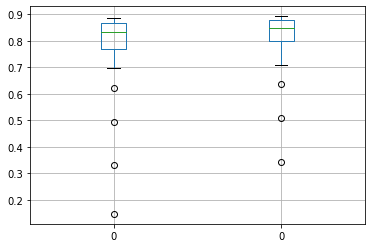

In [0]:
print(history.history['val_accuracy'])

print(history.history['accuracy'])

ta = pd.DataFrame(history.history['accuracy'])
va = pd.DataFrame(history.history['val_accuracy'])

tva = pd.concat([ta,va] , axis=1)

tva.boxplot()

## Observations on Epochs

1. Without early stopping, epochs leads to clear overfitting
2. Increasing Epochs is not useful. The Model becomes severly overfit
3. With smaller batch size, looks like it is a case of curse of dimensionality.... 
4. large batch size of 30,000 the model stabilizes, avoids overfitting but the score is marginally reduced in validation. This shows that too many epochs with small batch size is a waste. 

## Overall observation on layers, number of neurons, batch size and epoch
1. Keep the model simple in terms of number of layers and number of neurons. This will reduce time to train, less computation
   needs
    
2. Keep batch size on the larger side. It stabilizes the mode and gives more reliable estimates. If the entire data and fit in
then do not use batch size 

3. Too many epochs is not helpful. It leads to waste of time and resources and overfit models Constrain epochs using early 
stopping.

4. use more epochs if the batch size is large. With smaller batch size, the model tends to overfit in first few epochs... the
situation become worse with more epochs


# Activation function selection

Epoch 1/20
2/2 [==============================] - 1s 325ms/step - loss: 2.4025 - accuracy: 0.1686 - val_loss: 2.1883 - val_accuracy: 0.3764
Epoch 2/20
2/2 [==============================] - 1s 284ms/step - loss: 2.1492 - accuracy: 0.4132 - val_loss: 2.0297 - val_accuracy: 0.4843
Epoch 3/20
2/2 [==============================] - 1s 285ms/step - loss: 2.0036 - accuracy: 0.5017 - val_loss: 1.9071 - val_accuracy: 0.5386
Epoch 4/20
2/2 [==============================] - 1s 296ms/step - loss: 1.8805 - accuracy: 0.5559 - val_loss: 1.7784 - val_accuracy: 0.6202
Epoch 5/20
2/2 [==============================] - 1s 291ms/step - loss: 1.7527 - accuracy: 0.6474 - val_loss: 1.6475 - val_accuracy: 0.7268
Epoch 6/20
2/2 [==============================] - 1s 286ms/step - loss: 1.6274 - accuracy: 0.7328 - val_loss: 1.5298 - val_accuracy: 0.7765
Epoch 7/20
2/2 [==============================] - 1s 288ms/step - loss: 1.5175 - accuracy: 0.7642 - val_loss: 1.4313 - val_accuracy: 0.7747
Epoch 8/20
2/2 [====

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Unrecognized location 'bottom right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


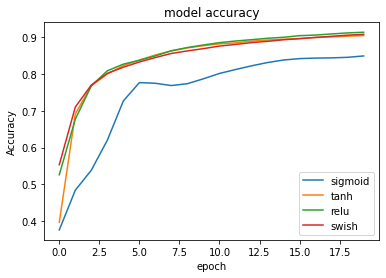

In [0]:
batch_size = 30000
epochs = 20

lr = tf.keras.layers.LeakyReLU


for activation in ['sigmoid', 'tanh', 'relu', 'swish']:
    model = Sequential()
    model.add(Dense(256, activation=activation, input_shape=(784,)))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

    history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
    loss, accuracy  = model.evaluate(x_test, y_test, verbose=False)
    
    print()
    print(f'Test loss: {loss:.3}')
    print(f'Test accuracy: {accuracy:.3}')
    
    plt.plot(history.history['val_accuracy'])

    
    
    
    
    
plt.title('model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['sigmoid', 'tanh', 'relu' , 'swish'], loc='lower right')

## Observations about choice of activation  functions

1. The blue line is for a linear function and surprisingly it is giving 91% + accuracy!
2. However, all the other standard activations ReLU, tanh, Sigmoid are performing relatively much better
3. All converge to same 98% +- accuracy score with increase in epoch (upto 15)
4. Any further increase in epochs may not help as all of them stop increasing beyond 
5. Sigmoid is the slowest learner followed by tanh while ReLU seems to learn fast....

# Learning Rate Optimization 

In [0]:
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import EarlyStopping

def create_model():
    model = Sequential()
    model.add(Dense(256, activation='relu', input_shape=(784,)))
    model.add(Dense(num_classes, activation='softmax'))  

    return model



In [0]:

def run_model(model, lrr):
    batch_size = 60000   
    epochs = 20
    model.summary()
    opt = tf.keras.optimizers.Adam(learning_rate=lrr) 
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=.1, verbose=False)
    loss, accuracy  = model.evaluate(x_test, y_test, verbose=False)
    print("learning rate" , lr)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')
    plt.show()







    print()
    print(f'Test loss: {loss:.3}')
    print(f'Test accuracy: {accuracy:.3}')


Model: "sequential_76"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_168 (Dense)            (None, 256)               200960    
_________________________________________________________________
dense_169 (Dense)            (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
learning rate 0.001


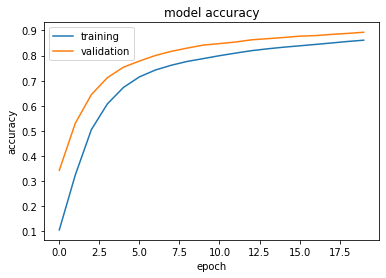


Test loss: 0.477
Test accuracy: 0.877
Model: "sequential_77"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_170 (Dense)            (None, 256)               200960    
_________________________________________________________________
dense_171 (Dense)            (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
learning rate 0.002


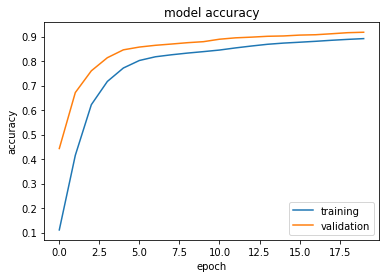


Test loss: 0.342
Test accuracy: 0.901
Model: "sequential_78"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_172 (Dense)            (None, 256)               200960    
_________________________________________________________________
dense_173 (Dense)            (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
learning rate 0.003


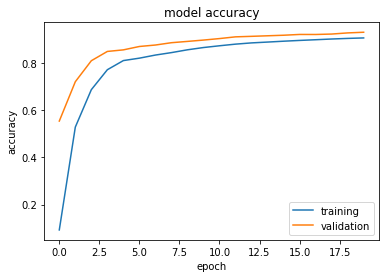


Test loss: 0.306
Test accuracy: 0.914
Model: "sequential_79"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_174 (Dense)            (None, 256)               200960    
_________________________________________________________________
dense_175 (Dense)            (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
learning rate 0.004


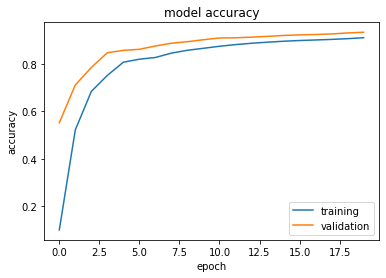


Test loss: 0.302
Test accuracy: 0.916
Model: "sequential_80"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_176 (Dense)            (None, 256)               200960    
_________________________________________________________________
dense_177 (Dense)            (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
learning rate 0.005


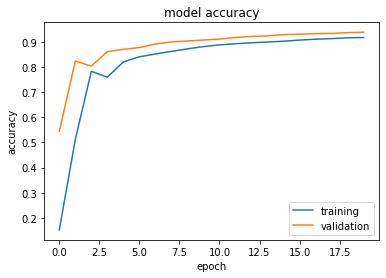


Test loss: 0.278
Test accuracy: 0.922
Model: "sequential_81"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_178 (Dense)            (None, 256)               200960    
_________________________________________________________________
dense_179 (Dense)            (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
learning rate 0.006


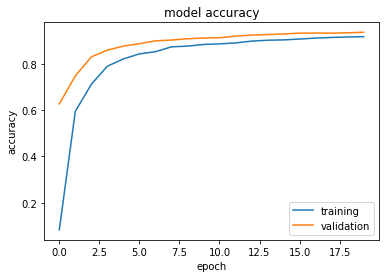


Test loss: 0.274
Test accuracy: 0.923
Model: "sequential_82"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_180 (Dense)            (None, 256)               200960    
_________________________________________________________________
dense_181 (Dense)            (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
learning rate 0.007


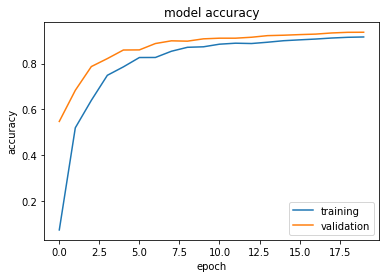


Test loss: 0.275
Test accuracy: 0.92
Model: "sequential_83"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_182 (Dense)            (None, 256)               200960    
_________________________________________________________________
dense_183 (Dense)            (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
learning rate 0.008


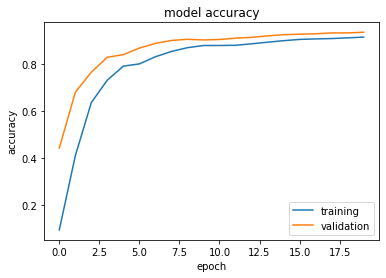


Test loss: 0.277
Test accuracy: 0.921
Model: "sequential_84"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_184 (Dense)            (None, 256)               200960    
_________________________________________________________________
dense_185 (Dense)            (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
learning rate 0.009000000000000001


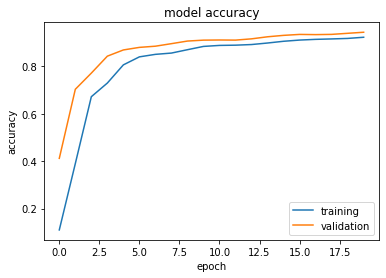


Test loss: 0.254
Test accuracy: 0.927


In [0]:
import numpy as np

for lr in np.arange(0.001, 0.01 , 0.001):    # try lr of 0.005 to 0.01 in steps of 0.001
    model = create_model()
    run_model(model , lr)


## Observations about choice of learning rate

1. Too small learning rates such as 0.00001 requires large number of epochs to learn. Both training and testing scores are low
2. Larger learning rates 0.05 for e.g. lead to unstable model in validation data and overall poor scores in training and test
3. Learning rates of 0.005 give more stable results early in the epoch. Becomes overfit with more epochs


# Gradient Descent Optimizers

In [0]:
def create_model():
    model = Sequential()
    model.add(Dense(256, activation='relu', input_shape=(784,)))
    model.add(Dense(num_classes, activation='softmax'))  

    return model



In [0]:
from tensorflow.keras import optimizers
 

def run_model(model):
    batch_size = 60000    # keep in 2^x 
    epochs = 20
    model.summary()
    # opt = optimizers.SGD(lr=0.005, decay=1e-6, momentum=0.9, nesterov=True)
    opt = tf.keras.optimizers.Adam(lr=0.005, decay=1e-6)
    #opt = tf.keras.optimizers.RMSprop(lr=0.005, decay=1e-6)


  
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=.1, verbose=False)
    loss, accuracy  = model.evaluate(x_test, y_test, verbose=False)
  
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')
    plt.show()







    print()
    print(f'Test loss: {loss:.3}')
    print(f'Test accuracy: {accuracy:.3}')


Model: "sequential_85"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_186 (Dense)            (None, 256)               200960    
_________________________________________________________________
dense_187 (Dense)            (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


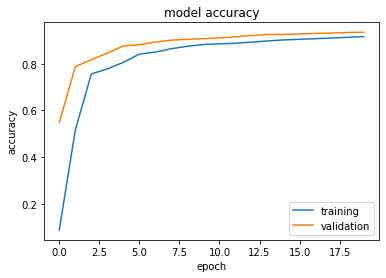


Test loss: 0.281
Test accuracy: 0.922


In [0]:
model = create_model()
run_model(model)

# Dropout based regularization



In [0]:
#from keras.constraints import max_norm
from tensorflow.keras.constraints import MaxNorm
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import EarlyStopping

def create_model():
    model = Sequential()
    model.add(Dense(256, activation='relu', input_shape=(784,)))
    model.add(Dense(256, activation='relu', kernel_constraint = MaxNorm(2)))
    model.add(Dropout(0.2) )  # 20% drop out for the first hidden layer   ----- > drop out
    model.add(Dense(num_classes, activation='softmax'))  

    return model



In [0]:
#from keras import optimizers

def run_model(model):
    batch_size = 60000   
    epochs = 20
    model.summary()
    opt = tf.keras.optimizers.Adam(lr=0.005)



  
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=.1, verbose=False)
    loss, accuracy  = model.evaluate(x_test, y_test, verbose=False)
  
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')
    plt.show()







    print()
    print(f'Test loss: {loss:.3}')
    print(f'Test accuracy: {accuracy:.3}')


Model: "sequential_86"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_188 (Dense)            (None, 256)               200960    
_________________________________________________________________
dense_189 (Dense)            (None, 256)               65792     
_________________________________________________________________
dropout_14 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_190 (Dense)            (None, 10)                2570      
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________


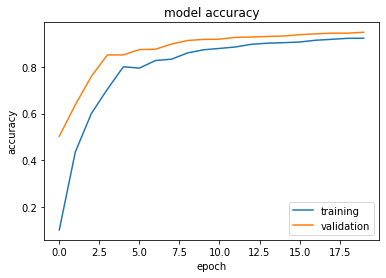


Test loss: 0.226
Test accuracy: 0.931


In [0]:
model = create_model()
run_model(model)

## Observations about Dropout 

1. Dropout layer on a simple model with one hidden layer seems to have an adverese impact.
2. Dropout layer is leading to unstable behavior in the model bothin training and testing



In [0]:



def create_model():
    model = Sequential()
    model.add(Dense(256, activation='relu', input_shape=(784,)))
    # model.add(BatchNormalization())
    model.add(Dense(num_classes, activation='softmax'))  

    return model



In [0]:
def run_model(model):
    batch_size = 60000
    epochs = 20
    model.summary()
    opt = optimizers.Adam(lr=0.005)
  
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=.1, verbose=False)
    loss, accuracy  = model.evaluate(x_test, y_test, verbose=False)
  
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')
    plt.show()

    print()
    print(f'Test loss: {loss:.3}')
    print(f'Test accuracy: {accuracy:.3}')


Model: "sequential_87"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_191 (Dense)            (None, 256)               200960    
_________________________________________________________________
dense_192 (Dense)            (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


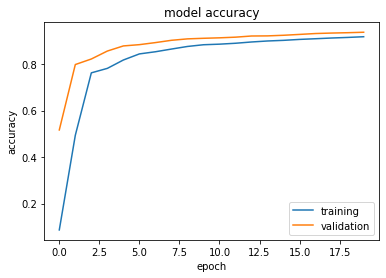


Test loss: 0.284
Test accuracy: 0.921


In [0]:
model = create_model()
run_model(model)

## Observation on Dropout layer with multiple layers

1. Use batch normalization only in deep neural networks to control the non linear transformations from becoming too large in magnitude



# Weight Initialization 


In [0]:
#from keras.initializers import he_normal


def create_model(wt_init):
    model = Sequential()
    model.add(Dense(256, activation='relu', input_shape=(784,), kernel_initializer = wt_init ))
    model.add(Dropout(0.2))  # drop out for the first hidden layer   ----- > drop out
    model.add(Dense(num_classes, activation='softmax'))  

    return model




In [0]:
def run_model(model):
    batch_size = 60000    
    epochs = 20
    model.summary()
    opt = tf.keras.optimizers.Adam(lr=0.005)
  
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=.1, verbose=False)
    loss, accuracy  = model.evaluate(x_test, y_test, verbose=False)
  
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')
    plt.show()

    print()
    print(f'Test loss: {loss:.3}')
    print(f'Test accuracy: {accuracy:.3}')


Model: "sequential_88"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_193 (Dense)            (None, 256)               200960    
_________________________________________________________________
dropout_15 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_194 (Dense)            (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


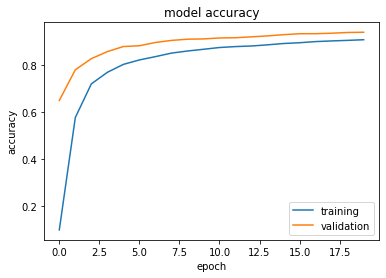


Test loss: 0.272
Test accuracy: 0.922


In [0]:
#wt_init = tf.keras.initializers.he_normal(seed=None)
#wt_init = tf.keras.initializers.lecun_uniform(seed=None)
wt_init = tf.keras.initializers.glorot_normal(seed=None)

model = create_model(wt_init)
run_model(model)

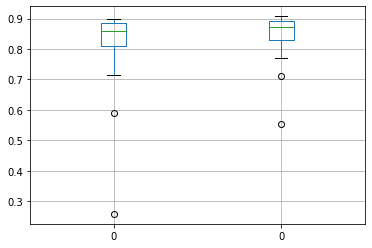

In [0]:
ta = pd.DataFrame(history.history['accuracy'])
va = pd.DataFrame(history.history['val_accuracy'])

tva = pd.concat([ta,va] , axis=1)

tva.boxplot()

In [0]:
# Observations of including kernel initialier of He_norm and other parameters
1. Frustrating! the model was looking very unstable with all the combinations of parameter values
2. raised the batch size to 30,000 and got rid of the instability
3. Avg accuracy of 98% in validation

# Grid Search

In [0]:

import numpy as np


from tensorflow.keras import utils

from tensorflow.keras.models import load_model








random_seed = 64
np.random.seed(random_seed)




from tensorflow.keras.constraints import MaxNorm
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.datasets import mnist
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.activations import relu
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV, cross_val_score

import matplotlib.pyplot as plt

In [0]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

num_classes = 10
x_train = x_train.reshape(60000, 784)    # 784 = 28 X 28 the size of each image. There are 60000 images for training
x_test = x_test.reshape(10000, 784)      # Images are flattended out into a vector of 784 elements
x_train = tf.keras.backend.cast_to_floatx(x_train)      # Change the data type to float from integer (0 - 255)
x_test = tf.keras.backend.cast_to_floatx(x_test)
x_train /= 255.0                           # Scale the data between 0 and 1
x_test /= 255.0

original_y_train = y_train
original_y_test = y_test

y_train = tf.keras.utils.to_categorical(y_train, num_classes)   # Converting the target into categorical which is stored as numeric
y_test = tf.keras.utils.to_categorical(y_test, num_classes)     # Keras converst these into 1-hot coded vectors as these are lables


print ('Train size:', x_train.shape[0])
print ('Test size:', x_test.shape[0])



Train size: 60000
Test size: 10000


In [0]:
# Function to create model, required for KerasClassifier
def create_model(number_of_layers=2, neurons_per_layer = 32, dropout_percent = 0.2, optimizer='adam'):
    # create model
    model = Sequential()
    model.add(Dense(neurons_per_layer, activation='relu', input_shape=(784,)))
    
    for i in range(number_of_layers-1):
        model.add(Dense(neurons_per_layer, activation='relu', kernel_constraint = maxnorm(3)))
        model.add(Dropout(dropout_percent))
        
    # Add the output layer with softmax
    model.add(Dense(num_classes, kernel_initializer = 'normal', activation='softmax'))  
        
    
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
   
    return model

In [0]:
# create model
kc_model = KerasClassifier(build_fn=create_model,number_of_layers=2, neurons_per_layer = 256, optimizer = 'adam', epochs=20, batch_size=30000, verbose=0) # Wrapper for scikitlearn API, provides 
                                                                                    # facility to get scores 


In [0]:
kfold = StratifiedKFold(n_splits = 2, shuffle=True, random_state = 64)    # kept the n_splits = 2 for demo.... this is the K value 

In [0]:
results = cross_val_score(kc_model, x_train, original_y_train, cv=kfold, verbose=1)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   31.5s finished


In [0]:
print('results = {}\nresults.mean = {}'.format(results, results.mean()))

results = [0.87326664 0.87180001]
results.mean = 0.8725333213806152


In [0]:
# define the grid search parameters

param_grid = dict(number_of_layers = [2 , 3],
                 neurons_per_layer = [32 , 128],
                 optimizer = ['adam', 'sgd'])


In [0]:

gridsearcher = GridSearchCV(estimator=kc_model, param_grid=param_grid, n_jobs=1)
grid_result = gridsearcher.fit(x_train, original_y_train)

In [0]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.895350 using {'neurons_per_layer': 128, 'number_of_layers': 3, 'optimizer': 'adam'}
0.727767 (0.031929) with: {'neurons_per_layer': 32, 'number_of_layers': 2, 'optimizer': 'adam'}
0.127667 (0.024001) with: {'neurons_per_layer': 32, 'number_of_layers': 2, 'optimizer': 'sgd'}
0.695317 (0.023276) with: {'neurons_per_layer': 32, 'number_of_layers': 3, 'optimizer': 'adam'}
0.113617 (0.008836) with: {'neurons_per_layer': 32, 'number_of_layers': 3, 'optimizer': 'sgd'}
0.886917 (0.006307) with: {'neurons_per_layer': 128, 'number_of_layers': 2, 'optimizer': 'adam'}
0.190517 (0.034718) with: {'neurons_per_layer': 128, 'number_of_layers': 2, 'optimizer': 'sgd'}
0.895350 (0.004849) with: {'neurons_per_layer': 128, 'number_of_layers': 3, 'optimizer': 'adam'}
0.144033 (0.014353) with: {'neurons_per_layer': 128, 'number_of_layers': 3, 'optimizer': 'sgd'}


In [0]:
#learn_rate = [0.001, 0.002]
#momentum = [0.0, 0.1, 0.3]
#optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
#init_mode = ['uniform', 'lecun_uniform', 'normal', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']
# activation = ['relu', 'tanh', 'sigmoid']
# dropout_rate = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
#neurons = [10, 12, 13, 14, 15]